In [1]:
import pandas as pd
import os

In [2]:
files = [file for file in os.listdir("D:\My projects\Sales Analysis\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("D:\My projects\Sales Analysis\Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index = False)
    
    

In [3]:
all_data = pd.read_csv(r"D:\My projects\Sales Analysis\all_data.csv")

### Cleaning the data

## Droping Nan values

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how ="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Finding "Or" and delete it

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

## Adding month column

In [7]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Adding City column

In [8]:
def get_city(address):
    return address.split(",")[1] 

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Q1. What was the best month of sales? How much was earned that month?

In [9]:
results = all_data.groupby("Month").sum()
results

C:\Users\Gurwinder singh\AppData\Local\Temp\ipykernel_246296\2427530905.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


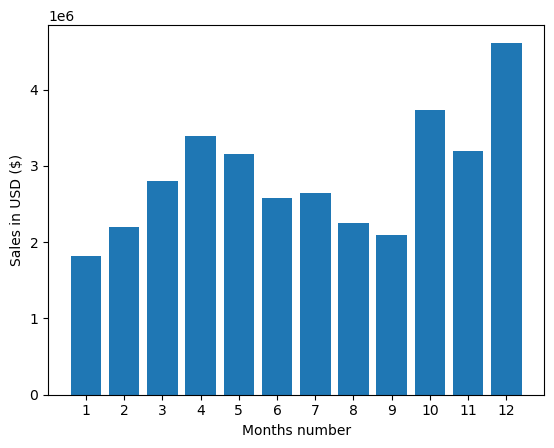

In [10]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months number")
plt.show()

### Q2. Which City has the highest number of sales?

In [11]:
results = all_data.groupby("City").sum()
results

C:\Users\Gurwinder singh\AppData\Local\Temp\ipykernel_246296\4193423410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


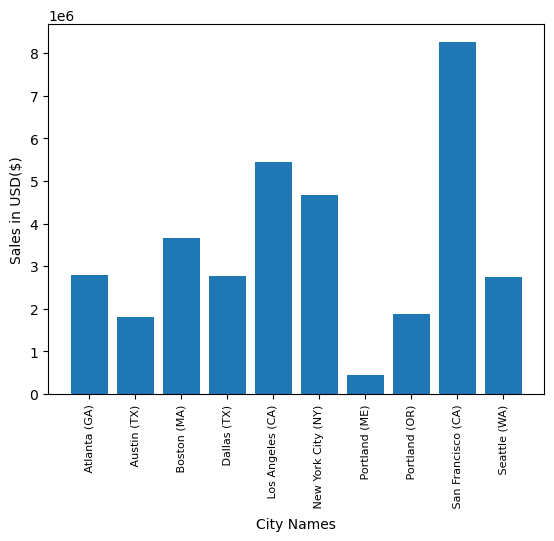

In [12]:
# City_names = all_data["City"].unique()

Cities = [city for city,df in all_data.groupby("City")]  

plt.bar(Cities,results["Sales"])
plt.xticks(Cities, rotation = 'vertical',size = 8)
plt.xlabel("City Names")
plt.ylabel("Sales in USD($)")
plt.show()

### Q3. What time should we Display advertisements to maximize likelihood of customer's buying product?

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

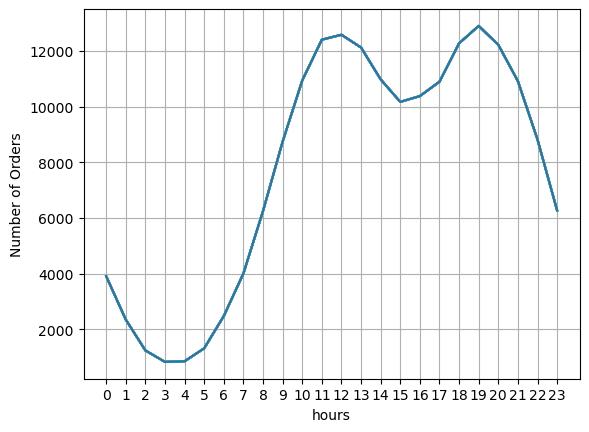

In [17]:
hour = [hour for hour,df in all_data.groupby("Hour")]
plt.plot(hour,all_data.groupby('Hour').count())
plt.xticks(hour)
plt.xlabel("hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


### Q4. What Products are most often sold together?

In [35]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))
df = df[["Order ID","grouped"]].drop_duplicates()

C:\Users\Gurwinder singh\AppData\Local\Temp\ipykernel_246296\3980509846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))


In [34]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['grouped'] :
    row_lst = row.split(",")
    count.update(Counter(combinations(row_lst,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

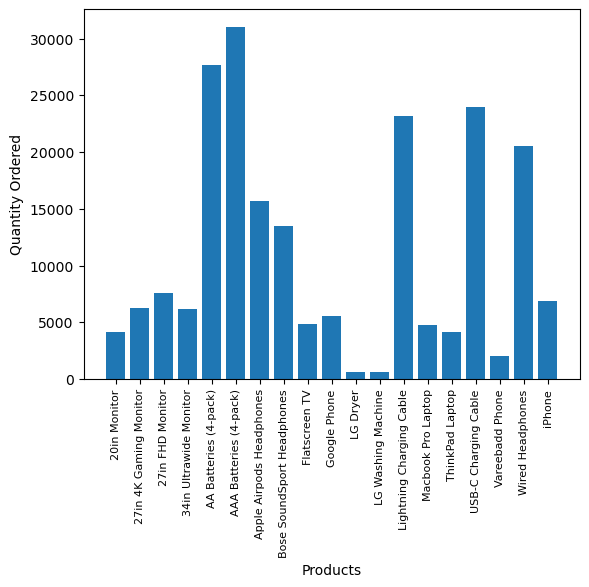

In [57]:
product_sold = all_data.groupby('Product')
quantity_ordered = product_sold['Quantity Ordered'].sum()

product = [product for product,df in product_sold]
plt.bar(product,quantity_ordered)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.xticks(product, rotation ='vertical',size = 8)
plt.show()

In [60]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1


C:\Users\Gurwinder singh\AppData\Local\Temp\ipykernel_246296\106679999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\Gurwinder singh\AppData\Local\Temp\ipykernel_246296\106679999.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation = 'vertical',size = 8)


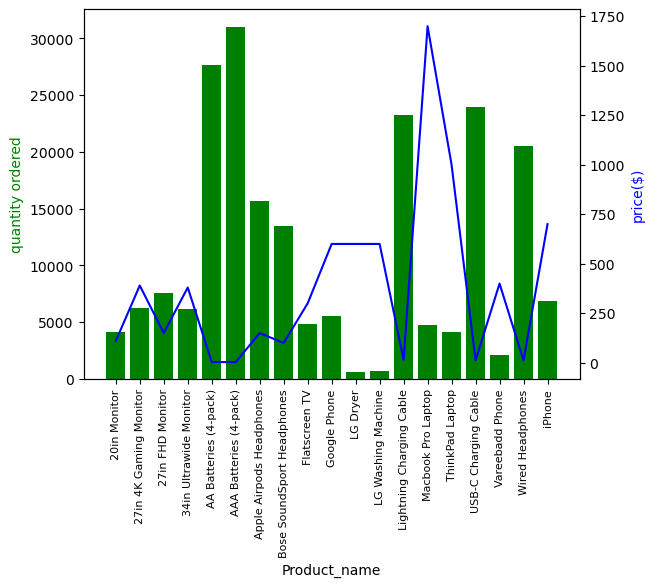

In [68]:
prices = all_data.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered,color ='g')
ax2.plot(product,prices,'b-')

ax1.set_xlabel("Product_name")
ax1.set_ylabel("quantity ordered", color = 'g')
ax2.set_ylabel('price($)',color = 'b')
ax1.set_xticklabels(product,rotation = 'vertical',size = 8)
plt.show()

